##### Imports/Settings

In [1]:
# General imports
import pandas as pd
import numpy as np
import csv
import os

# Pandas display settings
pd.set_option("display.max_colwidth",150)
pd.set_option('display.max_columns', None)

# Graph imports
import seaborn as sns
import matplotlib.pyplot as plt

# Graph settings
sns.set(context = "notebook", style = "white", font="verdana") # font_scale = 1.35)

# Function imports
from function_scripts.temp_funcs import read_file, merge_dataframes, \
                                        drop_cols, drop_nans, \
                                        filter_date_range, filter_df, create_cond_df, \
                                        create_container_df, create_user_tube_id, create_user_ivscc

##### Graph details

In [2]:
sub_region_order = ["MB", "PAL", "STRd", "STRv", "TH"]
sub_layer_order = ["SNc", "SNr", "Gpe", "Gpi", "CP", "ACB", "MD", "VAL"]

##### Paths

In [3]:
# IVSCC Data Blitz directory
path_ivscc_csv = "C:/Users/ramr/Documents/Github/analysis_projects/ivscc_analysis/csv/"

# Ephys features csv
path_ephys = os.path.join(path_ivscc_csv, "ephys_features.csv")

# Main JEM directory
path_main_jem = "//allen/programs/celltypes/workgroups/279/Patch-Seq/compiled-jem-data"

# JEM csv files
path_jem = os.path.join(path_main_jem, "jem_metadata.csv")
path_jem_na = os.path.join(path_main_jem, "jem_metadata_tubeNA.csv")
path_jem_fail = os.path.join(path_main_jem, "jem_metadata_wFAILURE.csv")

In [4]:
fields_jem = ["date", "name", "organism_name", "status", "roi_major", "roi_minor", "rigOperator", "container"]
fields_ephys = ["b'name'", "b'vrest'", "b'ri'", "b'sag'", "b'tau'",
                "b'upstroke_downstroke_ratio_long_square'", "b'latency'", "b'f_i_curve_slope'"]

In [5]:
jem = read_file(path_jem, fields_jem)
ephys = read_file(path_ephys, fields_ephys)

jem = create_user_tube_id(jem, "rigOperator")
jem = create_user_ivscc(jem, "rigOperator")

drop_nans_list = ["date", "roi_major", "user_tube_id"]
jem = drop_nans(jem, drop_nans_list)

jem = filter_df(jem, "organism_name", "Mouse")
jem = create_cond_df(jem, "roi_major", sub_region_order)
jem = drop_cols(jem, ["container", "status", "organism_name", "rigOperator"])
jem = filter_date_range(jem, "date", "2021-01-01", "2021-12-31")

INFO:function_scripts.temp_funcs:Read file in as a pandas dataframe
INFO:function_scripts.temp_funcs:Read file in as a pandas dataframe
INFO:function_scripts.temp_funcs:Created a user_tube_id column to show(ex.'PA')
INFO:function_scripts.temp_funcs:Created a user_ivscc column to show(ex.'Ram')
INFO:function_scripts.temp_funcs:Dropped NaNs from these columns: ['date', 'roi_major', 'user_tube_id']
INFO:function_scripts.temp_funcs:Filtered dataframe based on organism_name == Mouse
INFO:function_scripts.temp_funcs:Created a conditional dataframe based on roi_major containing ['MB', 'PAL', 'STRd', 'STRv', 'TH']
INFO:function_scripts.temp_funcs:Dropped columns: ['container', 'status', 'organism_name', 'rigOperator']
C:\Users\ramr\Documents\Github\analysis_projects\ivscc_analysis\function_scripts\temp_funcs.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

In [6]:
jem

,name,date,roi_major,roi_minor,user_tube_id,user_ivscc
12809,Ctgf-T2A-dgCre;Ai14-560647.09.06.02,2021-01-05 10:20:00 -0800,MB,SNr,P8,Lindsay
12810,Ctgf-T2A-dgCre;Ai14-560647.09.06.01,2021-01-05 10:20:00 -0800,MB,SNr,P8,Lindsay
12811,Vip-IRES-Cre;Ai14-560422.06.09.01,2021-01-05 13:08:28 -0800,MB,SNr,P8,Lindsay
12812,Vip-IRES-Cre;Ai14-560422.06.09.02,2021-01-05 13:08:28 -0800,MB,SNr,P8,Lindsay
12813,Vip-IRES-Cre;Ai14-560422.06.09.03,2021-01-05 13:08:28 -0800,MB,SNr,P8,Lindsay
...,...,...,...,...,...,...
13017,Slc17a7-IRES2-Cre;Ai14-565034.05.09.02,2021-02-12 10:30:39 -0800,TH,MD,PA,Ram
13018,Slc17a7-IRES2-Cre;Ai14-565034.05.09.01,2021-02-12 10:30:39 -0800,TH,MD,PA,Ram
13020,Slc32a1-IRES-Cre;Ai14-565016.06.09.02,2021-02-12 13:50:56 -0800,TH,VAL,PA,Ram
13019,Slc32a1-IRES-Cre;Ai14-565016.06.09.01,2021-02-12 13:50:56 -0800,TH,VAL,PA,Ram


In [7]:
merge = merge_dataframes(jem, ephys, "name", "b'name'", "inner")

# Renaming ephys columns
merge.rename(columns={"b'vrest'": "Vm(mV)", 
                      "b'ri'": "Input Resistance(MΩ)",
                      "b'sag'" : "Sag Fraction", 
                      "b'tau'": "τ(s)",
                      "b'upstroke_downstroke_ratio_long_square'": "LS AP up/downstoke", 
                      "b'latency'" : "Latency",
                      "b'f_i_curve_slope'" : "F-I Curve"}, inplace=True)

INFO:function_scripts.temp_funcs:Merged two pandas dataframe into one dataframe


In [8]:
region_mb = filter_df(merge, "roi_major", "MB") # SNc, SNr
region_pal = filter_df(merge, "roi_major", "PAL") # Gpi, Gpe
region_strd = filter_df(merge, "roi_major", "STRd") # CP
region_strv = filter_df(merge, "roi_major", "STRv") # ACB
region_th = filter_df(merge, "roi_major", "TH") # MD, VAL

INFO:function_scripts.temp_funcs:Filtered dataframe based on roi_major == MB
INFO:function_scripts.temp_funcs:Filtered dataframe based on roi_major == PAL
INFO:function_scripts.temp_funcs:Filtered dataframe based on roi_major == STRd
INFO:function_scripts.temp_funcs:Filtered dataframe based on roi_major == STRv
INFO:function_scripts.temp_funcs:Filtered dataframe based on roi_major == TH


In [23]:
print("MB:", len(region_mb))
print("PAL:", len(region_pal))
print("STRd:", len(region_strd))
print("STRv:", len(region_strv))
print("TH:", len(region_th))

MB: 41
PAL: 24
STRd: 32
STRv: 34
TH: 20


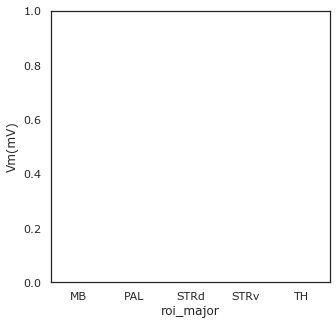

In [14]:
f, axes = plt.subplots(figsize = (5, 5))

ax = sns.boxplot(x="roi_major", y="Vm(mV)", data=merge, order=sub_region_order)

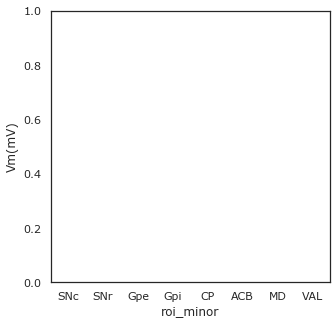

In [15]:
f, axes = plt.subplots(figsize = (5, 5))

ax = sns.boxplot(x="roi_minor", y="Vm(mV)", data=merge, order=sub_layer_order)